In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


In [123]:
data = pd.read_csv(r'C:\Users\USER\OneDrive\Documents\GitHub\0205-linear-regression-project-Tracy-teb\train.csv')
data

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [125]:
data.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [126]:
data.columns

Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [127]:
data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


### Data Preparation

In [128]:
# Separate Features and target variable
X = data.drop(['id', 'yield'], axis=1)
y = data['yield']

In [129]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Engineering

In [130]:
# Identify numeric and categorical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

Numeric columns: Index(['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')
Categorical columns: Index([], dtype='object')


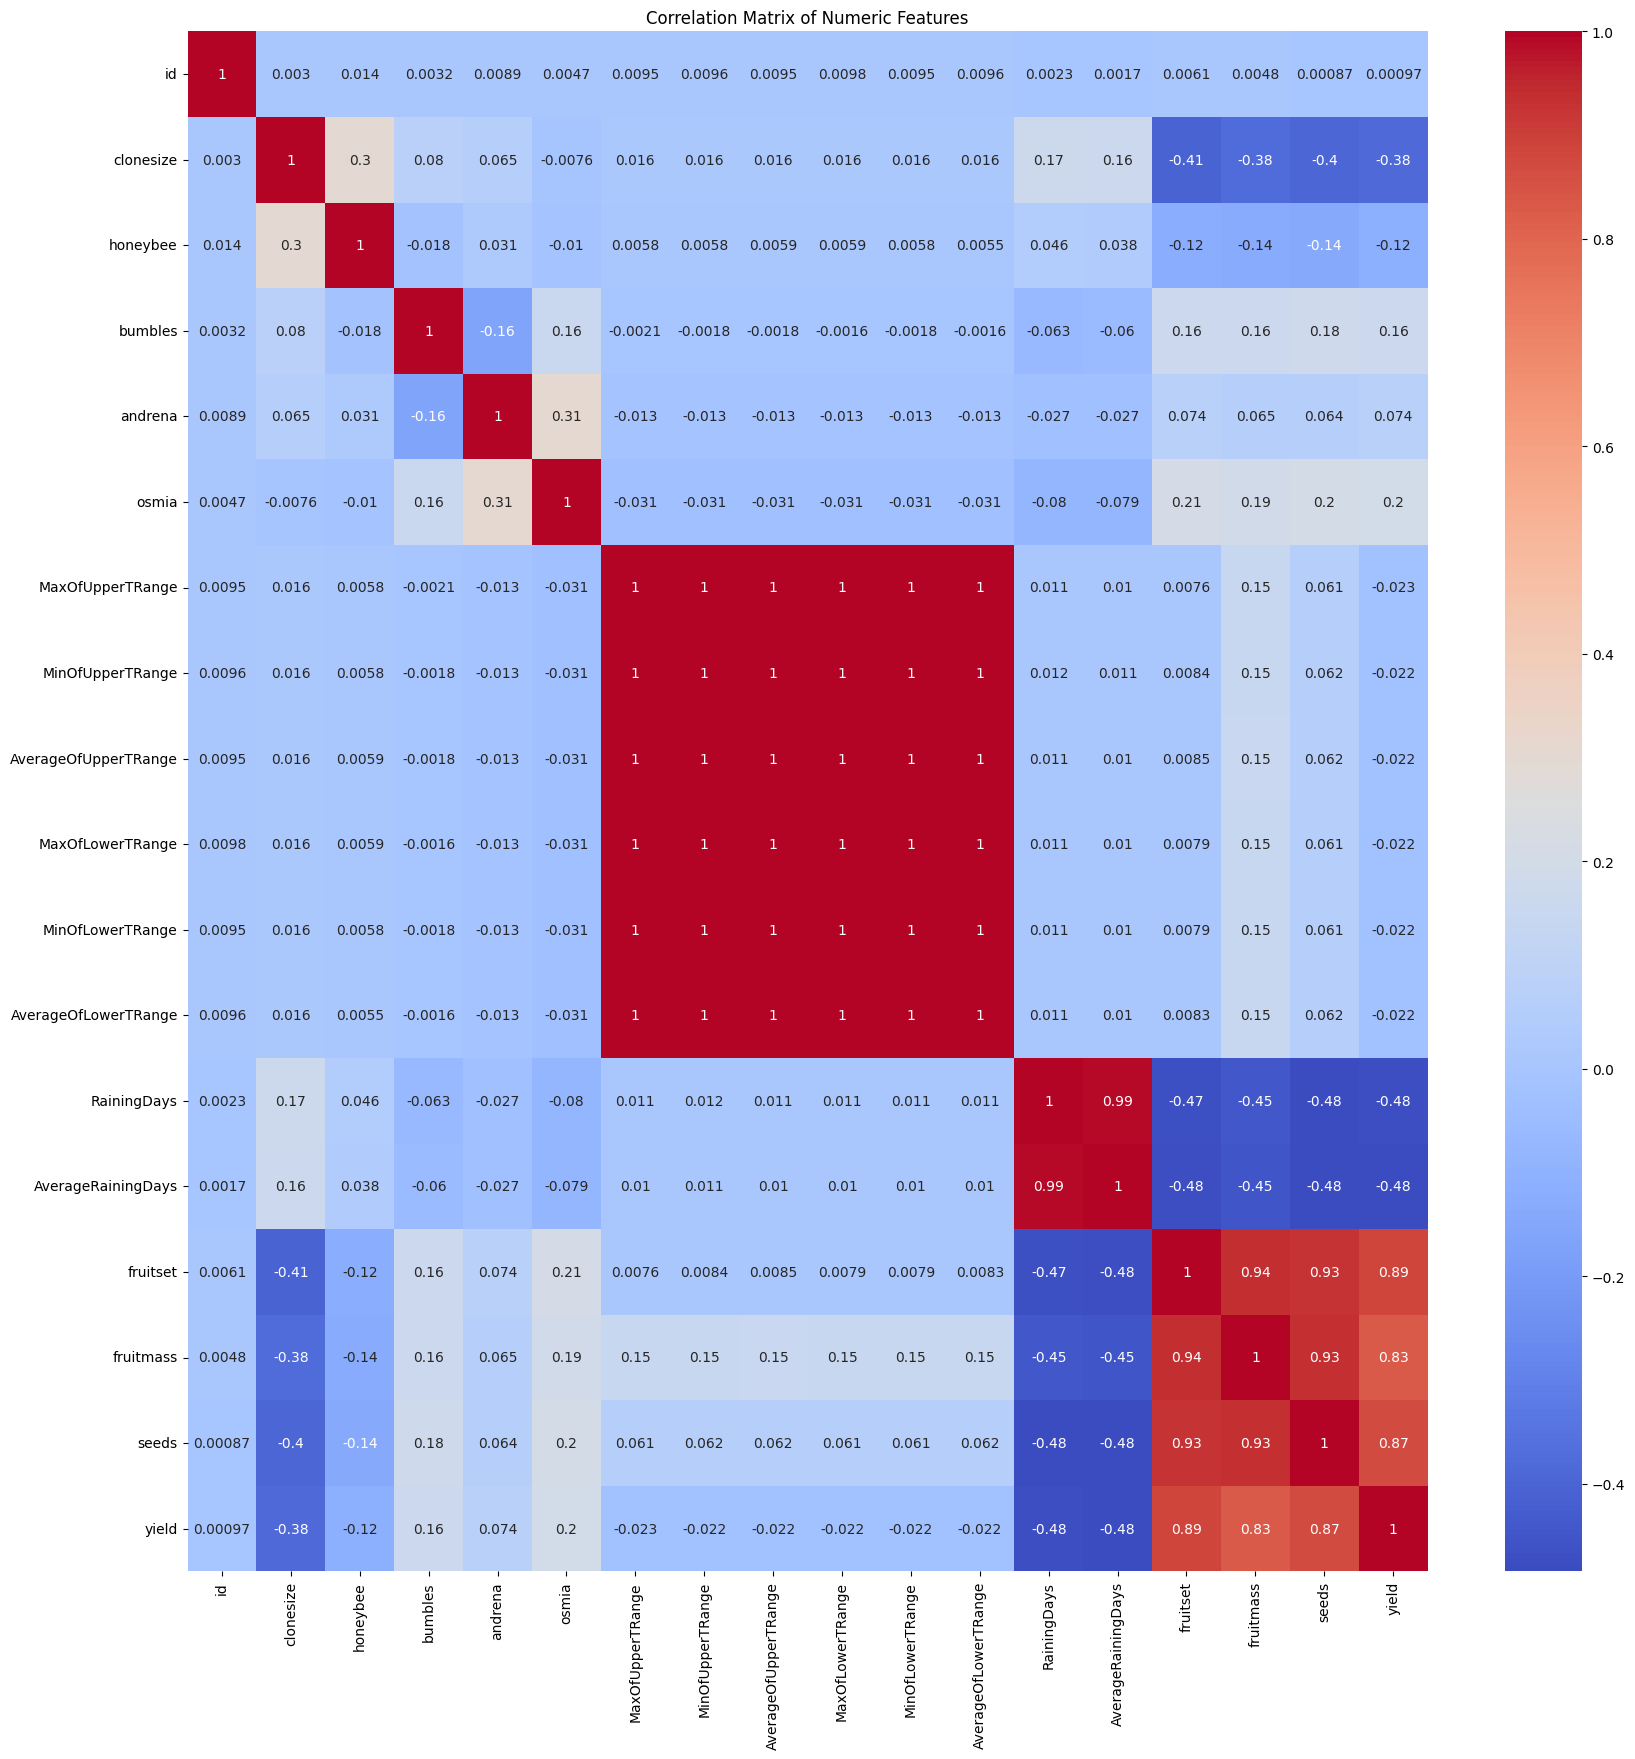

In [131]:
# Calculate correlation matrix for numeric columns only
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [132]:
# Add all the new features
data['bee_diversity'] = data[['honeybee', 'bumbles', 'andrena', 'osmia']].sum(axis=1)
data['dominant_bee'] = data[['honeybee', 'bumbles', 'andrena', 'osmia']].idxmax(axis=1)
data['upper_temp_range'] = data['MaxOfUpperTRange'] - data['MinOfUpperTRange']
data['lower_temp_range'] = data['MaxOfLowerTRange'] - data['MinOfLowerTRange']
data['overall_temp_range'] = data['MaxOfUpperTRange'] - data['MinOfLowerTRange']
data['temp_stability'] = data['AverageOfUpperTRange'] - data['AverageOfLowerTRange']
data['rainy_day_ratio'] = data['RainingDays'] / 365
data['bees_per_clone'] = data[['honeybee', 'bumbles', 'andrena', 'osmia']].sum(axis=1) / data['clonesize']
data['fruit_set_to_mass_ratio'] = data['fruitset'] / data['fruitmass']
data['seeds_to_mass_ratio'] = data['seeds'] / data['fruitmass']
data['temp_rain_interaction'] = data['AverageOfUpperTRange'] * data['AverageRainingDays']
data['fruitset_squared'] = data['fruitset'] ** 2
data['seeds_squared'] = data['seeds'] ** 2


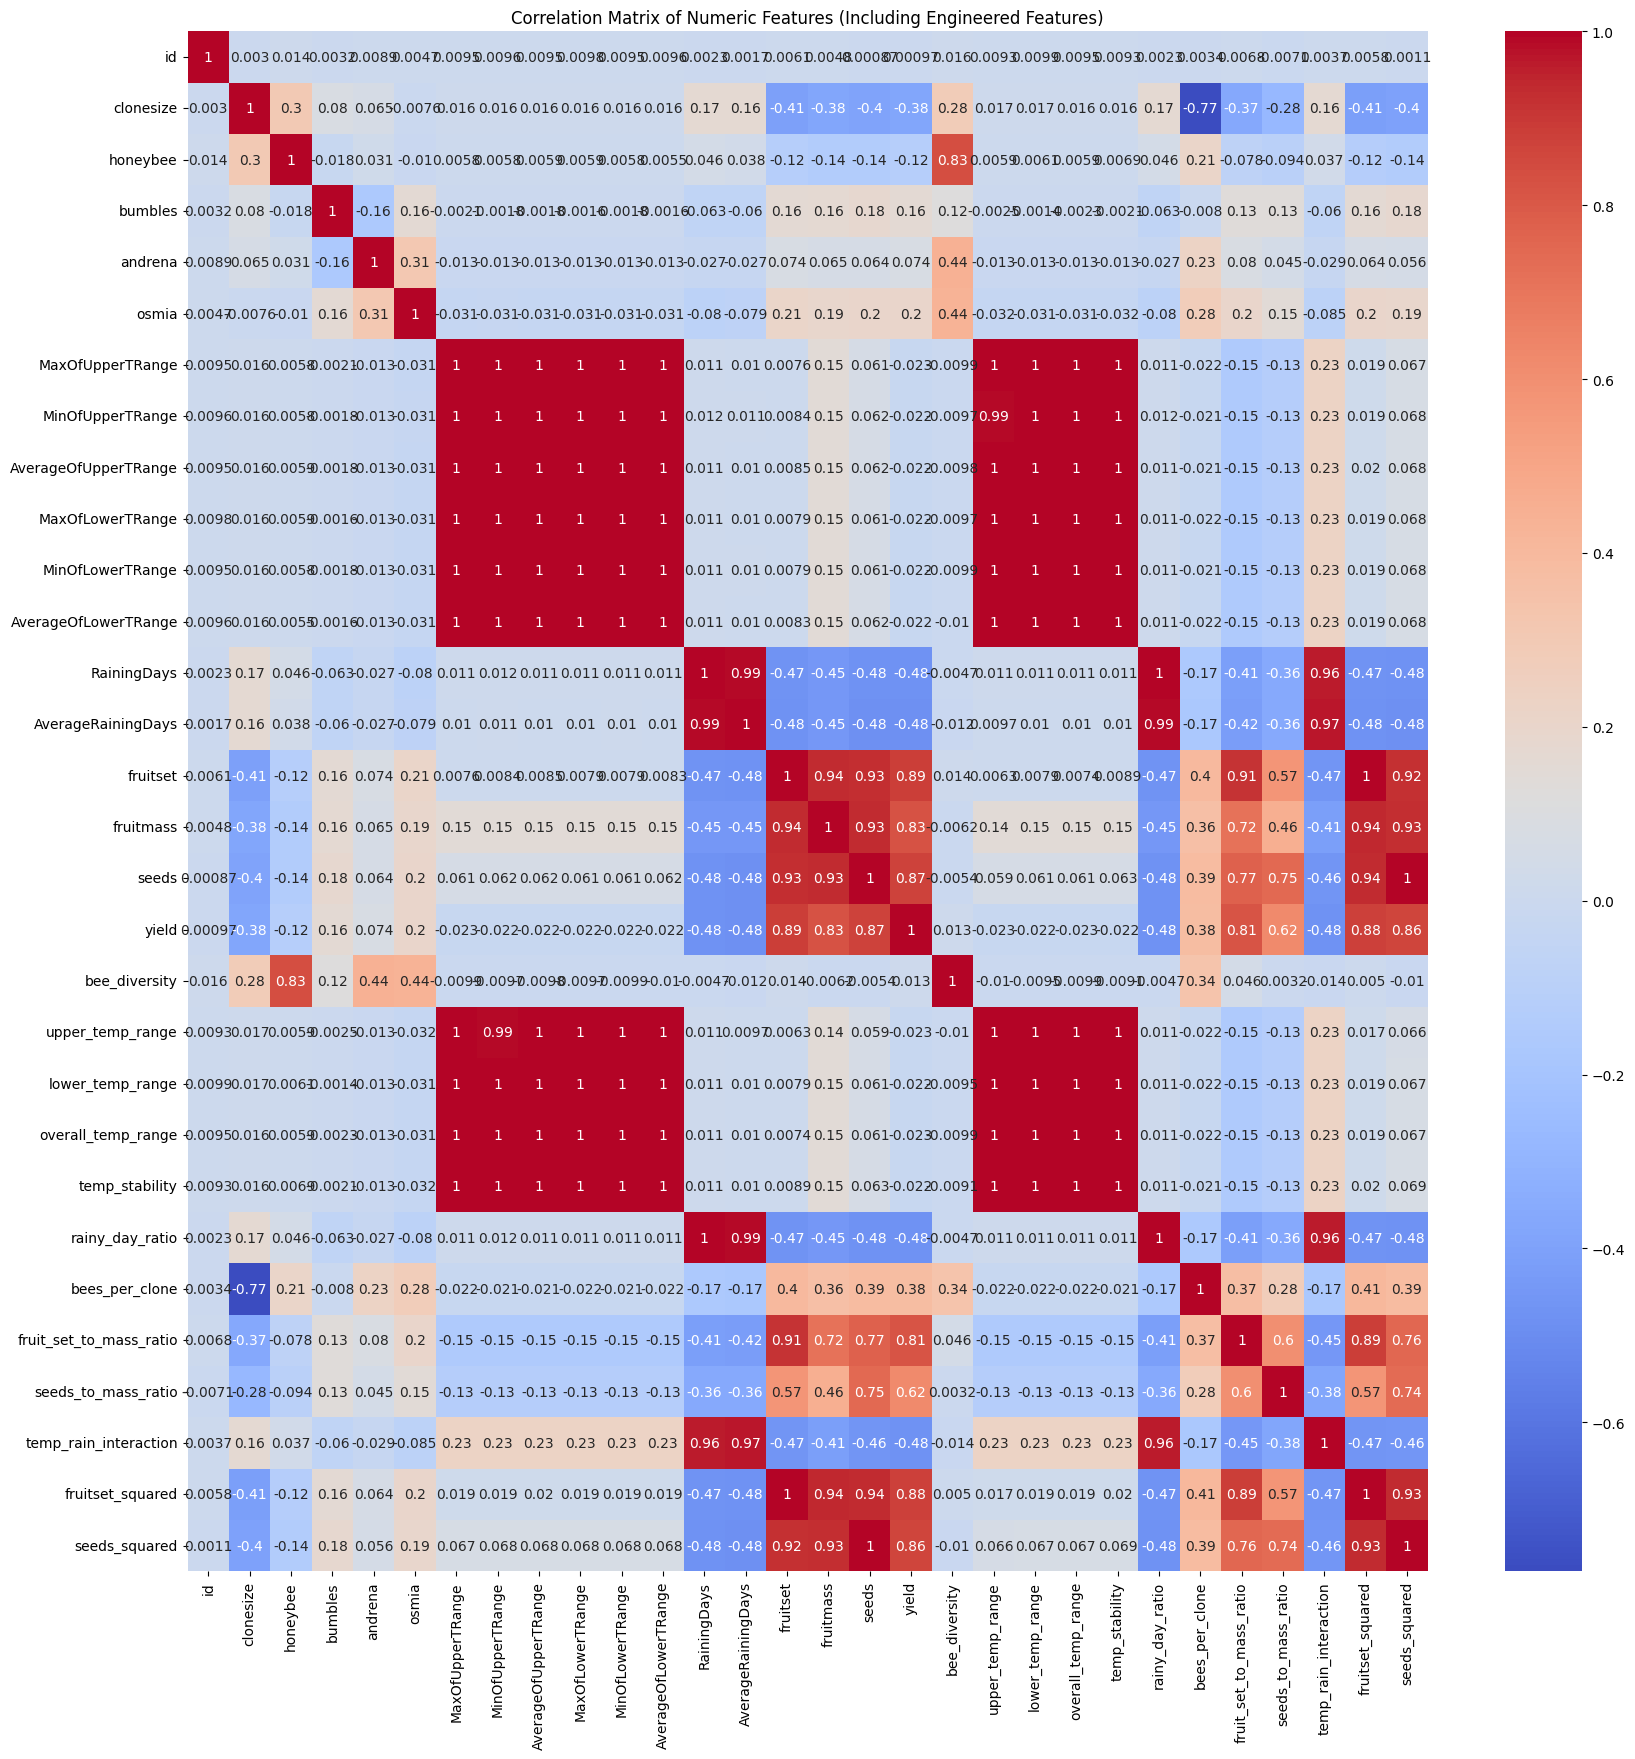

In [133]:
# Update numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calculate and visualize the new correlation matrix
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features (Including Engineered Features)')
plt.show()

### Preprocessing

In [134]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [135]:
# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    
])


### Model Training and Evaluation

In [136]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

results = {}



In [137]:
for name, model in models.items():
    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
#Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Fit the model on the entire training data
    pipeline.fit(X_train, y_train)
    
# Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
# Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {
        'Cross-validation MAE': -cv_scores.mean(),
        'Test MAE': mae
    }

In [138]:
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Cross-validation MAE: {metrics['Cross-validation MAE']:.4f}")
    print(f"Test MAE: {metrics['Test MAE']:.4f}")


Linear Regression:
Cross-validation MAE: 372.4063
Test MAE: 370.4475

Ridge Regression:
Cross-validation MAE: 372.3832
Test MAE: 370.7443

Lasso Regression:
Cross-validation MAE: 372.3253
Test MAE: 370.6571


In [139]:
# Select the best model
best_model = min(results, key=lambda x: results[x]['Test MAE'])
print(f"\nBest Model: {best_model}")


Best Model: Linear Regression


In [140]:
print("Categorical features:", categorical_features)

Categorical features: Index([], dtype='object')


In [141]:
from sklearn.preprocessing import OneHotEncoder

categorical_data = X[categorical_features]
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(categorical_data)

print("Encoded feature names:", encoder.get_feature_names_out(categorical_features))

Encoded feature names: []


In [143]:
# Print feature types
print("Numeric features:", numeric_features.tolist())
print("Categorical features:", categorical_features.tolist())

# Fit the pipeline
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', models[best_model])])
best_pipeline.fit(X_train, y_train)

# Try access the fitted OneHotEncoder
try:
    onehot_encoder = best_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    print("OneHotEncoder categories:", onehot_encoder.categories_)
except Exception as e:
    print(f"Error accessing OneHotEncoder: {e}")

# Get feature names (including all original features)
feature_names = X.columns.tolist()

# Get coefficients
if hasattr(best_pipeline.named_steps['model'], 'coef_'):
    coefficients = best_pipeline.named_steps['model'].coef_
    
    # Ensure coefficients is 1D
    if coefficients.ndim > 1:
        coefficients = coefficients.ravel()
    
    # Create feature importance dataframe
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(coefficients)
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))
else:
    print("The model doesn't have a 'coef_' attribute. Unable to determine feature importance.")
    

Numeric features: ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']
Categorical features: []
Error accessing OneHotEncoder: 'OneHotEncoder' object has no attribute 'categories_'

Top 10 Most Important Features:
                 feature   importance
9       MinOfLowerTRange  2587.176851
7   AverageOfUpperTRange  2003.234808
10  AverageOfLowerTRange  1386.875887
13              fruitset   866.993879
15                 seeds   554.733866
5       MaxOfUpperTRange   455.018557
14             fruitmass   269.473300
8       MaxOfLowerTRange   195.895243
6       MinOfUpperTRange   119.572366
12    AverageRainingDays    73.841693


### Test Data

In [144]:
test_data = pd.read_csv(r"C:\Users\USER\OneDrive\Documents\GitHub\0205-linear-regression-project-Tracy-teb\test.csv")
test_data

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,25478,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.474162,0.437923,34.525258
10190,25479,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.482854,0.440676,35.648221
10191,25480,25.0,0.50,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.568854,0.463065,37.724724
10192,25481,12.5,0.25,0.25,0.38,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.407374,0.409261,31.881847


**Extract the test_id's**

In [145]:
test_ids = test_data['id']